**Data Scientist Assignment - Advanced**

04-Feb-2022










In [11]:
# Loading the required packages #
import numpy as np
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Loading the required dataset #
Upload = files.upload()

Saving assignment_data.csv to assignment_data (1).csv


In [13]:
# Converting the dataset into pandas dataframe #
Data = pd.read_csv(io.BytesIO(Upload['assignment_data.csv']))
print(Data.head())
print("\n Dimensions of the data - ",Data.shape)

   ID  variable
0   1         0
1   2         0
2   3         2
3   4         0
4   5         0

 Dimensions of the data -  (10080, 2)


**Seggregration of Test set from Train set**

It is given that the train set consists of records of first 6 days of the week and 7th day can be considered as a test set. 

Hence, total number of observations in train set would be equal to 60 x 24 x 7.

In [14]:
Train = range(0,60*24*6)
Data_Train = Data.loc[Train]
print("Dimensions of Train set are -",Data_Train.shape)
Data_Test = Data.drop(Data_Train.index)
print("Dimensions of Test set are -",Data_Test.shape)

Dimensions of Train set are - (8640, 2)
Dimensions of Test set are - (1440, 2)


**Basic Descriptive Analysis of Train Data**

In [15]:
Data_Train["variable"].describe()

count    8640.000000
mean        0.561921
std         4.229673
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       335.000000
Name: variable, dtype: float64

It is clear from the basic summary statistics that atleast 75% observations are zeros. This means that the mass of the probability distribution of the variable will be concentrated heavily at 0. This can also be seen from the next graph, which is the density plot of the variable.

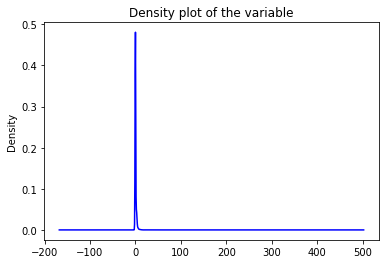

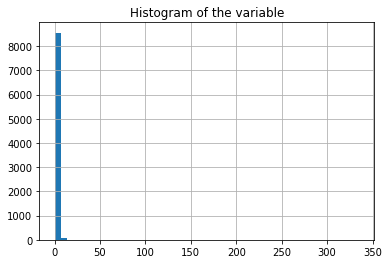

In [16]:
Data_Train.variable.plot.density(color='blue')
plt.title('Density plot of the variable')
plt.show()
Data_Train.hist('variable',bins = 50)
plt.title('Histogram of the variable')
plt.show()

Let's try to get the unique values taken by the series and their frequencies.

In [17]:
U = Data_Train['variable'].unique()
print(sorted(U))
print("\n Number of Unique values - ",U.shape[0])
Percent_Count = Data_Train['variable'].value_counts(normalize = True)*100
Percent_Count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 21, 22, 24, 26, 28, 32, 34, 41, 49, 52, 70, 98, 335]

 Number of Unique values -  31


0      84.525463
2       5.555556
3       4.421296
1       1.967593
4       1.469907
6       0.578704
5       0.486111
7       0.196759
8       0.173611
9       0.115741
10      0.115741
12      0.092593
14      0.034722
15      0.023148
13      0.023148
11      0.023148
28      0.023148
21      0.023148
24      0.011574
16      0.011574
26      0.011574
70      0.011574
34      0.011574
19      0.011574
41      0.011574
22      0.011574
52      0.011574
335     0.011574
98      0.011574
49      0.011574
32      0.011574
Name: variable, dtype: float64

**Outlier Detection Algorithms**

There are various sophisticated outlier or anomaly detection algorithms available in the literature. We can use parametric, density-based, clustering,etc. But, most of these algorithms make sense for high-dimensional or multivariate data, where we need to detect the outliers in multi-dimensional space. In our case, we have an univariate series. There are parametric methods for such cases, where we assume some distribution for the variable and then treat the observations outside of the 95% or 99% region as outliers. But, remember that our series is time series, which means observations are time dependent. Hence, we also need to explore some time series or stochastic methods.

Hence, I propose two different approaches (with increasing level of difficulty):


1. Simple Matching Algorithm
2. Distribution Fitting and Confidence Intervals




**1. Simple Matching Algorithm**

As we have seen, there are 31 unqiue values of the variable in train set. Now, if we observe a value in the test set, which is not seen in the train set, then that observation can be termed as an outlier or anomaly. Note that, this method heavily depends on the past data and their quality and variety. It may happen that a particular value is not observed in the train period, but it is perfectly fine to observe the same. Hence, the results generated from this algorithm should be interpreted for this specific sets of train and test sets only and a care must be taken before generalising them. 

Steps:-


1.  Store the unique values of train set in a vector
2.  For every observation in test set, check whether it belongs to the stored vector or not.
3. If it is not present, then we label such observation as an "outlier" or "anomaly".
4. Label all other observations as "Normal".
5. Plot all the observation from test set and label or highlight the points according to previous nomeclature.



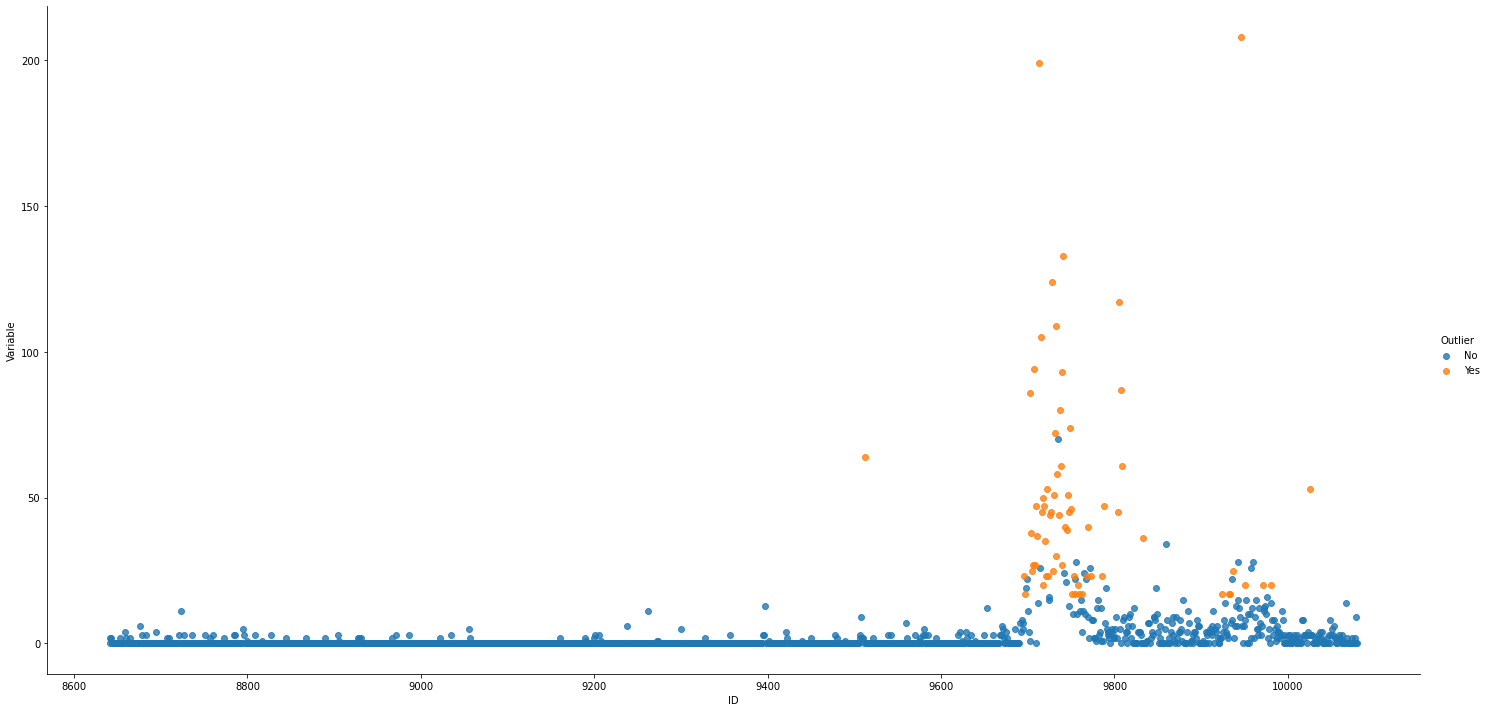

In [18]:
def Outlier_Plot(Df):
  Outlier = []
  for i in Df.index:
    if Df['variable'][i] not in U:
     Outlier.append("Yes")
    else:
     Outlier.append("No")

  Df = {"ID":Df['ID'],"Variable":Df['variable'].to_list(),'Outlier':Outlier}
  Pd_Df = pd.DataFrame(Df)

  plot = sns.lmplot(x='ID', y='Variable', data=Pd_Df, hue='Outlier', fit_reg=False,height = 10,aspect = 2)

  return plot

Outlier_Plot(Data_Test)


**2. Distribution Modeling and Confidence Interval**


Another way to detect the outliers is statistical distribution fitting. Note that, our series is a discrete series with a lot of zero values. Hence, our usual discrete probability distributions are not going to work here. We need to consider distributions which allow frequent zero-valued observations. One such well-known distribution is zero-inflated negative binomial model.This model mixes two processes. The first process generates zeros and the second one is governed by poisson distribution that generate counts, along with some zeros. Following is the p.m.f and the mathematical form of the distribution (source: NCSS Statistical Software - Chapter 328).


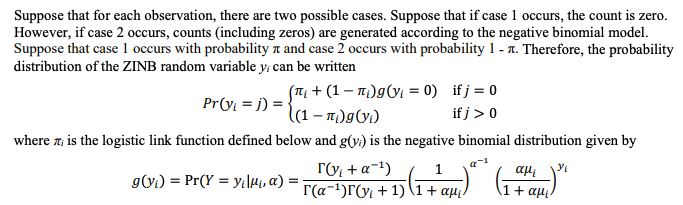

Due to the some limitations of Python, this work has been done in R. The final output of the outliers of test data is given below. Detailed R code with a notebook can be found on this link - https://drive.google.com/drive/folders/1LztWxY8EGAnTi-HmjGdKpwWf-L3Og9Sd?usp=sharing 

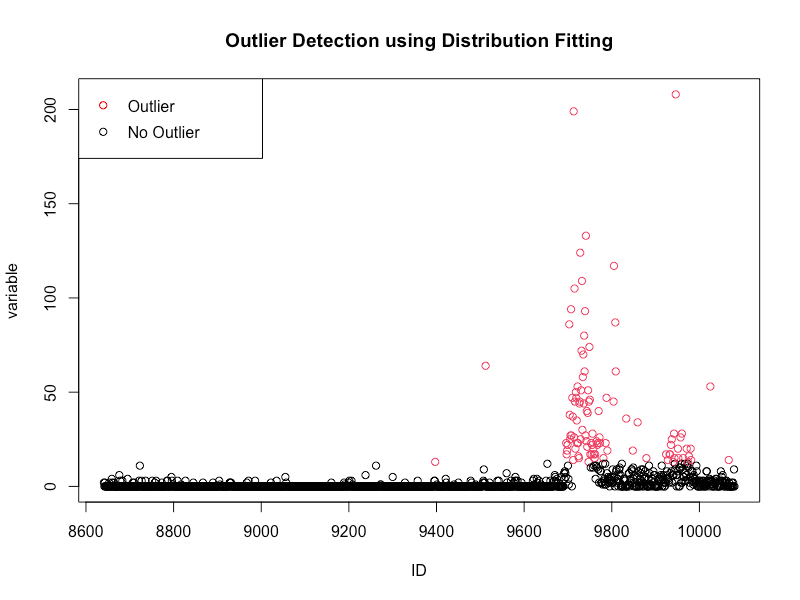

There are various advanced methods available which requires proper research and sufficient time. I will mention couple of those below - 

1. Anomaly Detection using Markov Chains - So far, the methods we have seen are don't consider the time dependency factor. Markov chain is a stochastic process where present state of a system depends only upon the immediate past. Our process can be modeled as a Markov chain where anomaly can be detected whenever there is an unusual behaviour in the Markov process. 

2. Time Series Modeling - Since, our process includes a lot of zeros, usual time series models are not appropriate tools to use. We need advanced time series models which can adjust for zero values and model the rest of the process independently. 